In [1]:
#calculate dpa through SRIM simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


/var/folders/k_/k89n8v0j34j1rkb6vmcfvz7c0000gn/T/ipykernel_16495/1344124510.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  v = pd.read_csv(fn, skiprows=28, nrows=100, sep='  ', names=['depth', 'V1', 'V2'],header=None)


,depth,V1,V2,dpa
0,100.01,0.059465,1.53345,0.337125
1,200.01,0.065147,1.65111,0.363229
2,300.01,0.069063,1.76092,0.387298
3,400.01,0.072362,1.84354,0.405482
4,500.01,0.076144,1.92015,0.422496
...,...,...,...,...
95,9600.01,0.000000,0.00000,0.000000
96,9700.01,0.000000,0.00000,0.000000
97,9800.01,0.000000,0.00000,0.000000
98,9900.01,0.000000,0.00000,0.000000


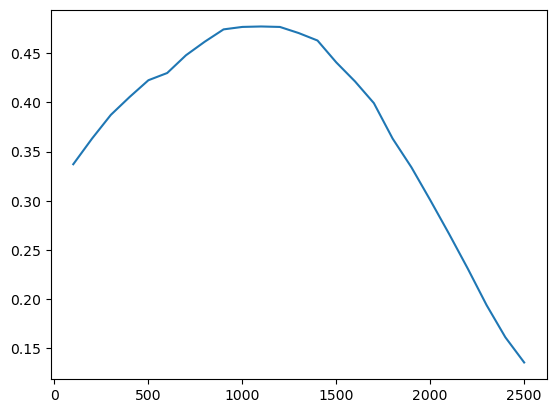

In [16]:
path='/Users/ruhe/Desktop/ga2o3/SRIM_dpa'
fn=path+'/VACANCY.txt'
# Read the CSV file with specified parameters
v = pd.read_csv(fn, skiprows=28, nrows=100, sep='  ', names=['depth', 'V1', 'V2'],header=None)
flunce=2*10**14
atom_density=9.45*10**22
v['dpa']=(v['V1']+v['V2'])*flunce/atom_density*10**8
plt.plot(v['depth'][0:25],v['dpa'][0:25])
v

In [4]:

#function to calculate displacements-per-atom (dpa)
def DPA(E,npka,estop,n,TDE):
    #input E:recoil energy
    #npka:cascade times
    #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
    #n:number of atoms
    #TDE: lattice dis-placement energy
    #output: dpa value
    Td=E-estop
    return npka*0.8*Td/(2*TDE*n)
TDEO1=16.69665071770335
TDEO2=17.730616302186878
TDEO3=16.35593220338983
TDEGa1=22.164750957854405
TDEGa2=19.410679611650487
mO=15.9994
mGa=69.72
TDEga2o3=((TDEO1+TDEO2+TDEO3)*mO+(TDEGa1+TDEGa2)*mGa)/(2*mGa+3*mO)

In [19]:
DPA(1500,10,193.294,81920,TDEga2o3)

0.0032225430710353087

In [21]:
pkal=np.zeros(100)
i=0
for dpa in v['dpa']:
    
    for pka in range(0,2001,10):
        c_dpa=DPA(1500,pka,193.294,81920,TDEga2o3)
        if np.abs(c_dpa-dpa)<=0.004:
            pkal[i]=int(pka)
            i+=1
            break
pkal= [int(num) for num in pkal]
v['pka']=pkal
pkal[:25]


[1040,
 1120,
 1190,
 1250,
 1300,
 1330,
 1380,
 1430,
 1460,
 1470,
 1470,
 1470,
 1450,
 1430,
 1360,
 1300,
 1230,
 1120,
 1030,
 930,
 820,
 710,
 590,
 490,
 410]